# Solution: Stochastic simulations in a population with pre-existing immunity

## Stochastic simulation with R<sub>0</sub> = 10 and R<sub>eff</sub> = 0.1

Remember that the effective reproduction number is proportional to the proportion of the population that is susceptible, as follows: 

\begin{align}
R_{eff} & = p_{sus} \times R_0 \\
      & = (1-p_{immune)} \times R_0
\end{align}

To get R<sub>eff</sub> = 0.1 and knowing that R<sub>0</sub> = 10, we can calculate p<sub>immune</sub> to be 0.99. In other words, all but 1% of the population are immune to the pathogen when it is introduced in the population. This is consistent, for example, with a population having 99% coverage of a fully effective vaccine.

In [ ]:
library("GillespieSSA")                                       # load package for stochastic algorithm
library("ggplot2")                                            # load plotting package
source("../../IDM3/w9_function.R")                            # loading the function for simulating repeated iterations

N <- 1000000                                                  # total population size

# Reff = 0.1
p_immune <-0.99                                               # proportion of the population immune at the beginning

initial_state_values <- c(S = (1-p_immune) * N,  
                          I = 1,       
                          R = p_immune * N,
                          cum_inc = 0)

# Simulate the stochastic model
set.seed(100)                                     # add this line to generate the same results each time you run this 
                                                  # example solution                                                  
res1 <- simulate_stoch_model(beta = 1, 
                             gamma = 0.1, 
                             n_sims = 100, 
                             plot = "prevalence",
                             final_time = 365)

### How often do you observe an epidemic for R<sub>eff</sub> = 0.1? What is the largest cumulative incidence that you find by the end of the simulation period?

As you can see in the cell below, if we consider an epidemic to involve at least 10 people becoming infected, we observe no outbreak in 100 iterations of the model. The maximum cumulative incidence in any iteration was 4 people. Despite a high R<sub>0</sub>, this is not surprising given that nearly the entire population is immune and R<sub>eff</sub> is very low.

In [2]:
paste("Number of outbreaks:", length(res1[res1>=10]))
paste("Maximum cumulative incidence:",max(res1))

[1] "Number of outbreaks: 0"

[1] "Maximum cumulative incidence: 4"

## Stochastic simulation with R<sub>0</sub> = 10 and R<sub>eff</sub> = 0.9

To get R<sub>eff</sub> = 0.9 and knowing that R<sub>0</sub> = 10, we can calculate p<sub>immune</sub> to be 0.91. Notice that this is only 8% reduction in the vaccination coverage in the previous example.

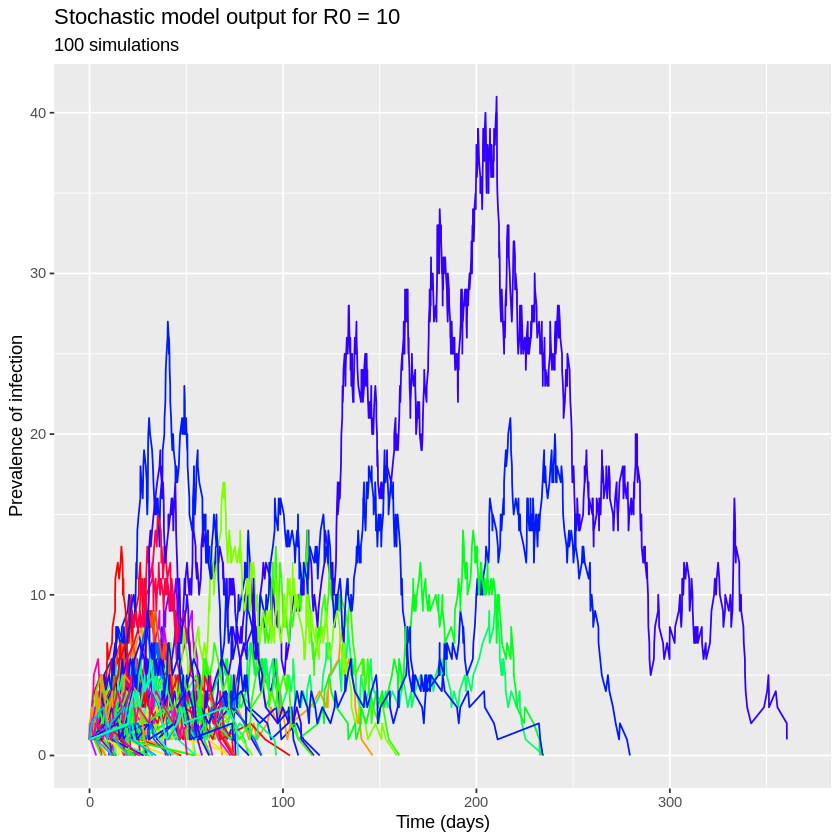

In [3]:
# Reff = 0.9
p_immune <- 0.91                                             # proportion of the population immune at the beginning

initial_state_values <- c(S = (1-p_immune) * N,  
                          I = 1,       
                          R = p_immune * N,
                          cum_inc = 0)

# Simulate the stochastic model
set.seed(101)                                         # add this line to ensure the solution file always look the same
res2 <- simulate_stoch_model(beta = 1, 
                             gamma = 0.1, 
                             n_sims = 100, 
                             plot = "prevalence",
                             final_time = 365)

In [4]:
paste("Number of outbreaks:", length(res1[res2>=10]))
paste("Maximum cumulative incidence:",max(res2))

[1] "Number of outbreaks: 36"

[1] "Maximum cumulative incidence: 511"

### How often do you observe an epidemic for R<sub>eff</sub> = 0.9? What is the largest cumulative incidence that you find by the end of the simulation period?

This time, despite R<sub>eff</sub> still being less than 1, we observe an outbreak in a quarter of iterations, with some of them involving hundreds of cases! In one of the simulated epidemics, as many as 536 people became infected, even though 91% of the population were immune to the pathogen.

This modelling exercises illustrates a scenario similar to the recent upsurges in measles cases that have been reported worldwide, due to declining vaccine coverage. Like the pathogen in this etivity, measles has a very high R<sub>0</sub>, so even relatively small reductions in vaccine coverage can give rise to localised epidemics. As you can see from the last example, when we take stochasticity into account, outbreaks can occur even if the existing immunity is above the critical vaccination threshold (which is 90% for an R<sub>0</sub> of 10).